## Importing necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import boxcox

## Data gathering

In [ ]:
data = pd.read_excel('stock_market_dataset.xlsx')

In [ ]:
data.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')

## Data preprocessing

In [ ]:
# changing column name format for uniformity
data.columns = data.columns.str.lower().str.replace('*','').str.replace(' ','_')

In [ ]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [ ]:
# changing datatype of 'date' column for further calculation
data['date'] = pd.to_datetime(data['date'])

In [ ]:
# getting 'weekday name', 'month name' and 'year' from 'date' columns
data['wkday'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month_name()
data['year'] = data['date'].dt.year

In [ ]:
data.head()

,date,open,high,low,close,adj_close,volume,wkday,month,year
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,Friday,April,2023
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,Thursday,April,2023
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,Wednesday,April,2023
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,Tuesday,April,2023
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,Monday,April,2023


In [ ]:
data.drop(['date'], axis=1, inplace=True)
data.head()

,open,high,low,close,adj_close,volume,wkday,month,year
0,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,Friday,April,2023
1,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,Thursday,April,2023
2,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,Wednesday,April,2023
3,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,Tuesday,April,2023
4,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,Monday,April,2023


In [ ]:
data.dtypes

,0
open,float64
high,float64
low,float64
close,float64
adj_close,float64
volume,int64
wkday,object
month,object
year,int32


In [ ]:
data.shape

(1258, 9)

## Statistical analysis

In [ ]:
data_corr = data.select_dtypes(include = np.number).corr()
data_corr

,open,high,low,close,adj_close,volume,year
open,1.000000,0.999043,0.998626,0.997592,0.997592,-0.088002,0.802391
high,0.999043,1.000000,0.998198,0.998682,0.998682,-0.073388,0.810497
low,0.998626,0.998198,1.000000,0.998839,0.998839,-0.115077,0.793203
close,0.997592,0.998682,0.998839,1.000000,1.000000,-0.096766,0.802385
adj_close,0.997592,0.998682,0.998839,1.000000,1.000000,-0.096766,0.802385
volume,-0.088002,-0.073388,-0.115077,-0.096766,-0.096766,1.000000,0.148537
year,0.802391,0.810497,0.793203,0.802385,0.802385,0.148537,1.000000


In [ ]:
# fetching relevant data for analysis based on correlation values
corr_threshold = 0.7
new_cols = []
close_corr = data_corr['close']
close_corr.drop(['close'],inplace = True)
for i in close_corr.index:
    if close_corr[i] > corr_threshold:
        new_cols.append(i)
new_cols

['open', 'high', 'low', 'adj_close', 'year']

In [ ]:
data_stat = data[new_cols].describe()
data_stat

,open,high,low,adj_close,year
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,29595.823045,29776.945739,29402.432226,29599.361677,2020.323529
std,4006.078299,4009.007573,4004.949066,4007.468822,1.487504
min,19028.360000,19121.010000,18213.650000,18591.930000,2018.000000
25%,26041.267500,26163.155000,25877.872500,26027.120000,2019.000000
50%,29201.410000,29335.685000,28996.500000,29199.460000,2020.000000
75%,33604.027500,33825.445000,33346.827500,33600.342500,2022.000000
max,36722.600000,36952.650000,36636.000000,36799.650000,2023.000000


## Features and target variables selection

In [ ]:
# setting target variable
y_col ='close'

# getting numerical columns
x_num = new_cols

In [ ]:
# getting categorical columns
x_cat = data.select_dtypes(exclude=np.number).columns
x_cat

Index(['wkday', 'month'], dtype='object')

In [ ]:
X_num = data[x_num]
X_cat = data[x_cat]
y = data[y_col]

In [ ]:
X_num.head()

,open,high,low,adj_close,year
0,33797.43,34104.56,33728.40,34098.16,2023
1,33381.66,33859.75,33374.65,33826.16,2023
2,33596.34,33645.83,33235.85,33301.87,2023
3,33828.34,33875.49,33525.39,33530.83,2023
4,33805.04,33891.15,33726.09,33875.40,2023


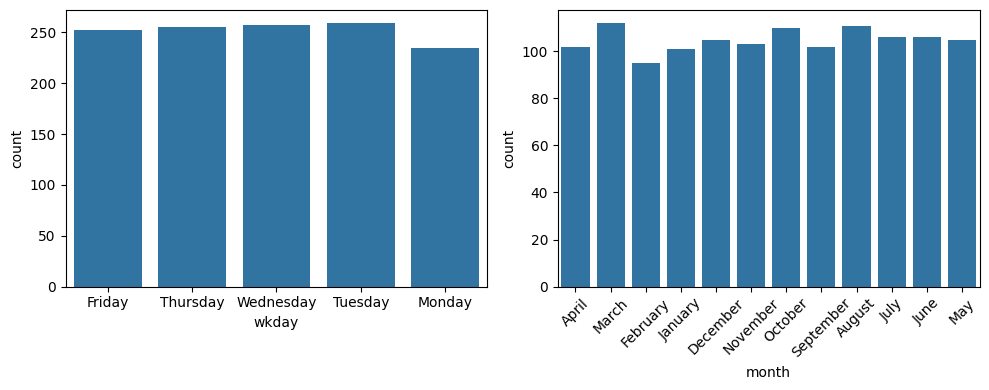

In [ ]:
# visualizing categorical features
fig, ax = plt.subplots(1,2, figsize = (10,4))

sns.countplot(x = 'wkday', data = data, ax = ax[0])
sns.countplot(x = 'month', data = data, ax = ax[1])
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()


In [ ]:
# one hot encoding for categorical variables
data_encode = pd.get_dummies(X_cat, drop_first = True).astype(int)
data_encode.head()

,wkday_Monday,wkday_Thursday,wkday_Tuesday,wkday_Wednesday,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_encode.shape

(1258, 15)

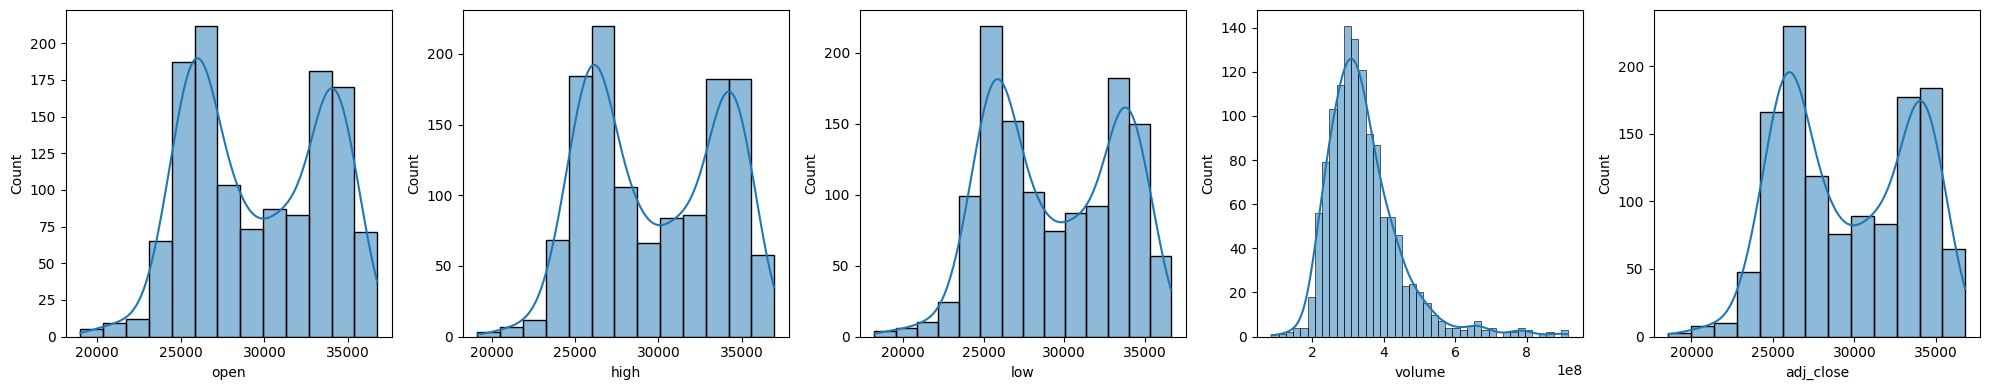

In [ ]:
# visualizing numerical features
fig, ax = plt.subplots(1,5, figsize = (20,4))
sns.histplot(x = 'open', data = data, ax = ax[0], kde = True)
sns.histplot(x = 'high', data = data, ax = ax[1], kde = True)
sns.histplot(x = 'low', data = data, ax = ax[2], kde = True)
sns.histplot(x = 'volume', data = data, ax = ax[3], kde = True)
sns.histplot(x = 'adj_close', data = data, ax = ax[4], kde = True)

plt.tight_layout()

## Data transformation

In [ ]:
X_log = np.log(X_num)
X_log.head()

,open,high,low,adj_close,year
0,10.428140,10.437186,10.426095,10.436999,7.612337
1,10.415762,10.429982,10.415552,10.428990,7.612337
2,10.422172,10.423644,10.411384,10.413369,7.612337
3,10.429054,10.430447,10.420058,10.420221,7.612337
4,10.428365,10.430909,10.426027,10.430444,7.612337


In [ ]:
X_log.describe()

,open,high,low,adj_close,year
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,10.286096,10.292316,10.279395,10.286210,7.611013
std,0.136967,0.135989,0.138158,0.137009,0.000736
min,9.853686,9.858543,9.809927,9.830483,7.609862
25%,10.167438,10.172107,10.161144,10.166894,7.610358
50%,10.281972,10.286560,10.274930,10.281905,7.610853
75%,10.422401,10.428969,10.414718,10.422292,7.611842
max,10.511148,10.517393,10.508787,10.513244,7.612337


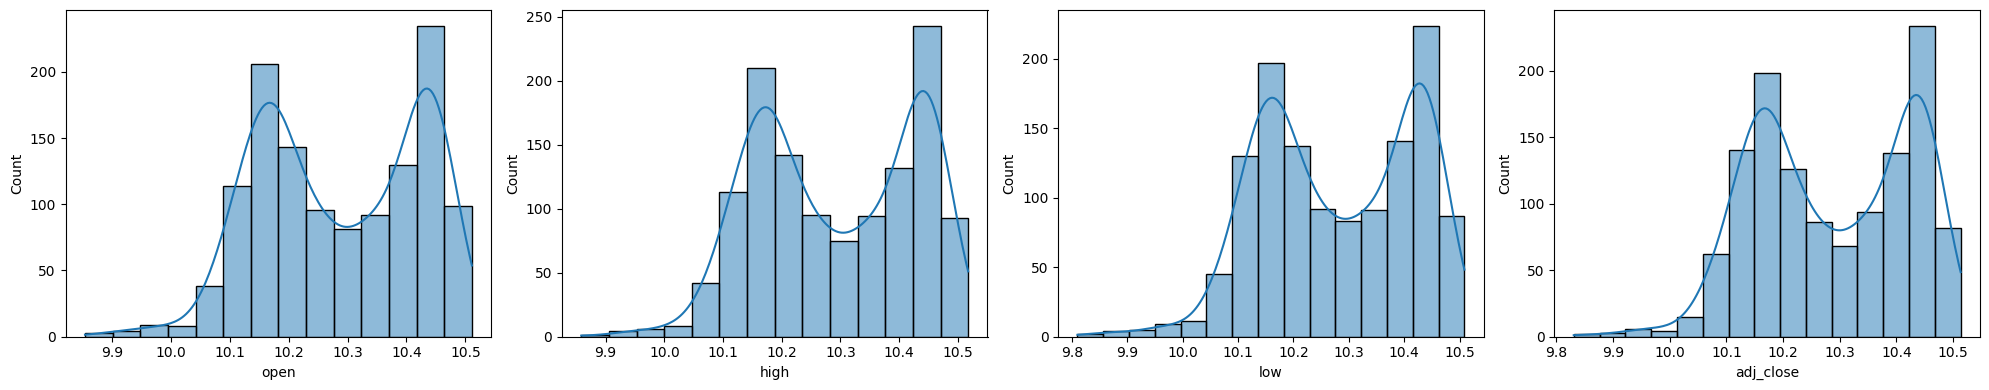

In [ ]:
fig, ax = plt.subplots(1,4, figsize = (20,4))
sns.histplot(x = 'open', data = X_log, ax = ax[0], kde = True)
sns.histplot(x = 'high', data = X_log, ax = ax[1], kde = True)
sns.histplot(x = 'low', data = X_log, ax = ax[2], kde = True)
sns.histplot(x = 'adj_close', data = X_log, ax = ax[3], kde = True)

plt.tight_layout()

In [ ]:
X_new = pd.concat([X_num, data_encode], axis = 1)
X_new.head()

,open,high,low,adj_close,year,wkday_Monday,wkday_Thursday,wkday_Tuesday,wkday_Wednesday,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,33797.43,34104.56,33728.40,34098.16,2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,33381.66,33859.75,33374.65,33826.16,2023,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33596.34,33645.83,33235.85,33301.87,2023,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,33828.34,33875.49,33525.39,33530.83,2023,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,33805.04,33891.15,33726.09,33875.40,2023,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_new_log = pd.concat([X_log, data_encode], axis = 1)
X_new_log.head()

,open,high,low,adj_close,year,wkday_Monday,wkday_Thursday,wkday_Tuesday,wkday_Wednesday,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,10.428140,10.437186,10.426095,10.436999,7.612337,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10.415762,10.429982,10.415552,10.428990,7.612337,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10.422172,10.423644,10.411384,10.413369,7.612337,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,10.429054,10.430447,10.420058,10.420221,7.612337,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10.428365,10.430909,10.426027,10.430444,7.612337,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.describe()

,close
count,1258.000000
mean,29599.361677
std,4007.468822
min,18591.930000
25%,26027.120000
50%,29199.460000
75%,33600.342500
max,36799.650000


In [ ]:
y_bc, y_lam = boxcox(y)

## Linear Regression model

The main objective of this project is to compare the coefficients and errors using different transformation and regularization methods. So, for this analysis, I will use the dataset: X_new_log and y_bc, which is log transformation of features (X_new_log) and bixcox_transformation of target variable (y_bc).

Case 1: Use standard scaler.

Case 2: Use standard scaler with Polynomial features of degree 2.

Case 3: Use standard scaler, polynomial feature with Lasso regularization (using cross validation method to find the best value of alpha)

Case 4: Use standard scaler, polymonial feature with Ridge regularization (using cross validation method to find the best value of alpha)



In [ ]:
# creating instances of linear regression model, and scaling and polynomial features
lr = LinearRegression()
std = StandardScaler()
poly = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
# creating instances for Lasso and Ridge Regression
lasso = Lasso()
ridge = Ridge()

In [ ]:
# splitting dataset into training and testing sets with test-size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_new_log, y_bc, test_size = 0.2, random_state = 42)

In [ ]:
# case 1: using standard scaler
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train MSE: ', mse_train)
print('Test MSE: ', mse_test )

print('Train R2: ', r2_train)
print('Test R2: ', r2_test)

index_val = ['Train MSE', 'Test MSE', 'Train R2', 'Test R2']

error_df = pd.DataFrame({'standard_scaler': [mse_train, mse_test, r2_train, r2_test]}, index = index_val)
error_df.head()

Train MSE:  23.01740750222537
Test MSE:  26.59780069274864
Train R2:  0.9986604189820496
Test R2:  0.9984727290163267


,standard_scaler
Train MSE,23.017408
Test MSE,26.597801
Train R2,0.998660
Test R2,0.998473


In [ ]:
# fetching coefficients of linear regression model
coef_lr = lr.coef_

# creating a dataframe , 'coef_df', of coefficients
coef_df = pd.DataFrame(coef_lr, index = X_new_log.columns, columns = ['coef'])
coef_df.sort_values(by = 'coef', ascending = False).head()

,coef
adj_close,953.069964
high,321.601397
wkday_Monday,0.225515
wkday_Wednesday,0.206782
wkday_Tuesday,-0.002778


In [ ]:
# case 2: using standard scaler and polynomial feature
X_train_poly = poly.fit_transform(X_train_std)
X_test_poly = poly.transform(X_test_std)

X_train_std = std.fit_transform(X_train_poly)
X_test_std = std.transform(X_test_poly)

lr.fit(X_train_std, y_train)
y_pred_test = lr.predict(X_test_std)
y_pred_train = lr.predict(X_train_std)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train MSE: ', mse_train)
print('Test MSE: ', mse_test )

print('Train R2: ', r2_train)
print('Test R2: ', r2_test)

error_df['scaling_and_polynomial'] =  [mse_train, mse_test, r2_train, r2_test]

error_df

Train MSE:  0.012881480154550066
Test MSE:  0.022028672159288012
Train R2:  0.9999992503158187
Test R2:  0.9999987350927174


,standard_scaler,scaling_and_polynomial
Train MSE,23.017408,0.012881
Test MSE,26.597801,0.022029
Train R2,0.998660,0.999999
Test R2,0.998473,0.999999


In [ ]:
# get column names after applying polynomial features
poly_cols = poly.get_feature_names_out(X_new_log.columns)
coef_poly = lr.coef_

# creating a dataframe for coefficients
coef_comparison = pd.DataFrame({'coef_poly': coef_poly}, index = poly_cols)
coef_comparison.sort_values(by = 'coef_poly', ascending = False).head()

,coef_poly
adj_close,131.686488
adj_close^2,10.354458
low^2,8.685403
open high,4.341573
low year,2.094522


In [ ]:
# case 3: standard scaler, polynomial feature with Lasso
lasso = Lasso()

# Define parameter grid for cross validation
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Grid Search
grid = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

# finding best alpha value for Lasso
best_alpha = grid.best_params_['alpha']
print("Best alpha for Lasso:", best_alpha)

Best alpha for Lasso: 0.0001


In [ ]:
# using best alpha value to predict target variable
lasso = Lasso(alpha = best_alpha)
lasso.fit(X_train_std, y_train)

y_pred_test = lasso.predict(X_test_std)
y_pred_train = lasso.predict(X_train_std)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train MSE: ', mse_train)
print('Test MSE: ', mse_test )

print('Train R2: ', r2_train)
print('Test R2: ', r2_test)

error_df['lasso'] =  [mse_train, mse_test, r2_train, r2_test]

Train MSE:  2.346972628068227
Test MSE:  2.950515320616112
Train R2:  0.999863409465992
Test R2:  0.9998305786073023


In [ ]:
# fetching coefficients for lasso regression
coef_lasso = lasso.coef_

# adding lasso coefficients to coef_comparison dataframe
coef_comparison['coef_lasso'] = coef_lasso

,coef_poly,coef_lasso
open,0.087192,-24.728911
high,-0.287661,45.917449
low,0.284323,34.302332
adj_close,131.686488,76.576743
year,-0.128484,-0.673542


In [ ]:
# case 4: standard sclaer, polynomial feature with Ridge
ridge = Ridge()

# Define parameter grid
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Grid Search
grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

# finding best alpha value for Ridge
best_alpha = grid.best_params_['alpha']
print("Best alpha for Ridge:", best_alpha)

Best alpha for Ridge: 0.0001


In [ ]:
# using best alpha value to predict target variable
ridge = Ridge(alpha = best_alpha)
ridge.fit(X_train_std, y_train)

y_pred_test = ridge.predict(X_test_std)
y_pred_train = ridge.predict(X_train_std)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('Train MSE: ', mse_train)
print('Test MSE: ', mse_test )

print('Train R2: ', r2_train)
print('Test R2: ', r2_test)

error_df['ridge'] =  [mse_train, mse_test, r2_train, r2_test]

Train MSE:  0.012885211036118888
Test MSE:  0.02191497597823962
Train R2:  0.9999992500986866
Test R2:  0.9999987416212601


In [ ]:
# fetching coefficients for Ridge regression
coef_ridge = ridge.coef_

# adding ridge coefficient to coef_comparison dataframe
coef_comparison['coef_ridge'] = coef_ridge

## Analysis comparison

In [ ]:
coef_comparison.sort_values(by = 'coef_poly', ascending = False).head()

,coef_poly,coef_lasso,coef_ridge
adj_close,131.686488,76.576743,131.678802
adj_close^2,10.354458,-2.632183,9.545485
low^2,8.685403,-0.093378,7.810204
open high,4.341573,0.611368,4.798296
low year,2.094522,0.579311,2.071938


In [ ]:
error_df

,standard_scaler,scaling_and_polynomial,ridge,lasso
Train MSE,23.017408,0.012881,0.012885,2.346973
Test MSE,26.597801,0.022029,0.021915,2.950515
Train R2,0.998660,0.999999,0.999999,0.999863
Test R2,0.998473,0.999999,0.999999,0.999831


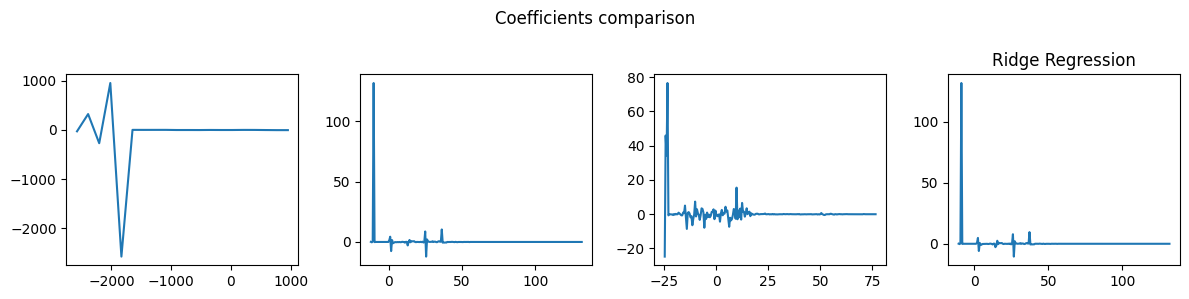

In [ ]:
fig, ax = plt.subplots(1,4, figsize = (12,3))

x_val_lr = np.linspace(coef_lr.min(), coef_lr.max(), len(coef_lr))
ax[0].plot(x_val_lr, coef_lr)
plt.title('Linear Regression')

x_val_poly = np.linspace(coef_poly.min(), coef_poly.max(), len(coef_poly))
ax[1].plot(x_val_poly, coef_poly)
plt.title('Polynoimal features')

x_val_lasso = np.linspace(coef_lasso.min(), coef_lasso.max(), len(coef_lasso))
ax[2].plot(x_val_lasso, coef_lasso)
plt.title('Lasso Regression')

x_val_ridge = np.linspace(coef_ridge.min(), coef_ridge.max(), len(coef_ridge))
ax[3].plot(x_val_ridge, coef_ridge)
plt.title('Ridge Regression')

fig.suptitle('Coefficients comparison')
plt.tight_layout()